In [ ]:
#Import library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#Import library untuk agglomerative clustering
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix


from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

## 1. Lakukan Agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!

**Plotting data**

In [ ]:
X1, y1 = make_blobs(n_samples=50, centers=[[1, 1], [3, -1], [2, 1], [-2, 1]], cluster_std=0.9)

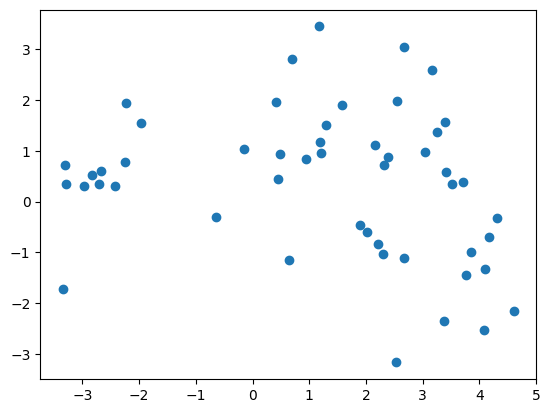

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

# **Agglomerative Clustering**

Agglomerative Hierarchical Clustering (AHC) merupakan metode clustering hierarkis yang dimulai dari setiap titik data sebagai kelompok terpisah. Kemudian, secara berurutan, kelompok-kelompok yang memiliki kedekatan tertentu digabungkan sehingga semua data tergabung dalam satu kelompok. Agglomerative clustering termasuk ke dalam jenis bottom-up clustering, artinya proses penggabungan kelompok akan terus berlanjut hingga mencapai satu kelompok utama.

# *Single Linkage*

In [ ]:
#Inisialisasi objek agglomerative
agglom_single = AgglomerativeClustering(n_clusters=4, linkage='single')

#melatih model pengelompokkan pada dataset
single_linkage = agglom_single.fit(X1, y1)
single_linkage
agglom_single.labels_

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 0])

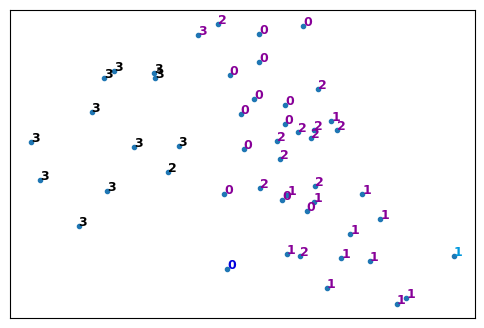

In [ ]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
            color=plt.cm.nipy_spectral(agglom_single.labels_[i] / 10.),
            fontdict={'weight': 'bold', 'size': 9})

# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')

# Display the plot
plt.show()

Kode diatas merupakan pengelompokkan data menggunakan algoritma agglomerative clustering dengan "Single Linkage". Single Linkage merupakan teknik pengelompokan dalam analisis data yang termasuk dalam kategori hierarchical clustering. Teknik ini bekerja dengan cara menggabungkan kelompok-kelompok data berdasarkan jarak terdekat di antara mereka.

Berdasarkan code diatas, pengelompokkan dibagi menjadi 4 cluster. Kemudian model di training sehingga hasil klasterisasi dapat ditampilkan dalam grafik, dimana setiap titik diberi warna sesuai dengan cluster yang dihasilkan.

# *Average Linkage*

In [ ]:
#Inisialisasi objek agglomerative
agglom_average = AgglomerativeClustering(n_clusters=4, linkage='average')

#melatih model pengelompokkan pada dataset
average_linkage = agglom_average.fit(X1, y1)
average_linkage
agglom_average.labels_

array([1, 3, 0, 3, 2, 1, 3, 2, 3, 3, 3, 2, 1, 3, 3, 0, 3, 0, 2, 0, 1, 3,
       2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 3,
       0, 3, 0, 0, 1, 2])

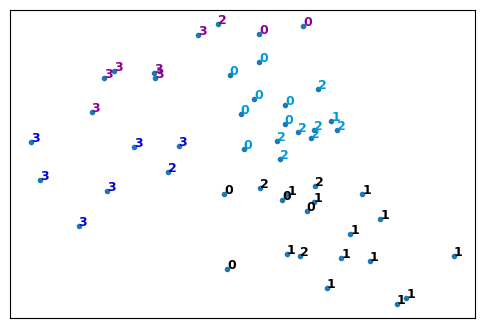

In [ ]:
# membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6,4))

# membuat minimum dan maksimum range dari X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# mencari rata-rata dari jarak X1
X1 = (X1 - x_min) / (x_max - x_min)

# looping untuk display semua datapoints
for i in range(X1.shape[0]):

    # menambahkan teks yang menunjukkan informasi label atau kategori data pada setiap titik scatter plot
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
            # memberikan warna pada plot
            color=plt.cm.nipy_spectral(agglom_average.labels_[i]/10.),
            fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])  # hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.yticks([])
#plt.axis('off')

# menampilkan plot dari data asli sebelum di cluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')

# menampilkan plot
plt.show()

Kode diatas merupakan pengelompokkan data menggunakan algoritma agglomerative clustering dengan "Average Linkage". Teknik average linkage menghitung jarak antara dua cluster dengan menggunakan jarak rata-rata dari setiap pasangan objek yang ada di dalam cluster tersebut.

Berdasarkan kode diatas, pengelompokkan klasterisasi kurang lebih sama dengan single linkage. Hanya saya pada average ini pengelompokkan dilakukan berdasarkan jarak rata-rata antar titik dalam kluster.

**Plotting Dendogram**

In [ ]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[0.         0.34389796 0.86477941 ... 0.95213015 0.26888696 0.42566497]
 [0.34389796 0.         0.60621786 ... 0.71062652 0.50871927 0.48278431]
 [0.86477941 0.60621786 0.         ... 0.11192219 0.85340447 0.63100465]
 ...
 [0.95213015 0.71062652 0.11192219 ... 0.         0.91616173 0.67949557]
 [0.26888696 0.50871927 0.85340447 ... 0.91616173 0.         0.25576157]
 [0.42566497 0.48278431 0.63100465 ... 0.67949557 0.25576157 0.        ]]


Kode diatas digunakan untuk menghitung matriks jarak antara semua pasangan titik dalam dataset X1 dengan fungsi distance_matrix.

In [ ]:
X = hierarchy.linkage(dist_matrix, 'single')
Y =  hierarchy.linkage(dist_matrix, 'average')

<ipython-input-9-bbd09c8fd080>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-9-bbd09c8fd080>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y =  hierarchy.linkage(dist_matrix, 'average')


Text(0.5, 1.0, 'Single Linkage')

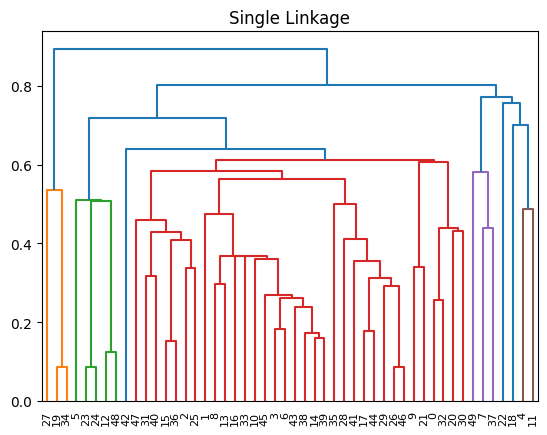

In [ ]:
#Single Linkage
dendroX = hierarchy.dendrogram(X)
plt.title("Single Linkage")

Grafik diatas merupakan hasil Agglomerative Clustering dengan single linkage, dimana pada dendrogram menggambarkan semakin tinggi percabangan maka semakin jauh jarak antar cluster yang digabungkan. Setiap titik data dikelompokkan dengan warna yang menunjukkan klaster yang berbeda, memberikan gambaran visual tentang bagaimana data dikelompokkan berdasarkan kedekatannya.

Text(0.5, 1.0, 'Average Linkage')

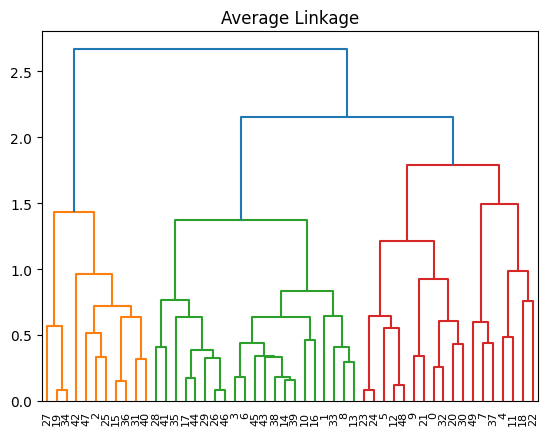

In [ ]:
#Average Linkage
dendroY = hierarchy.dendrogram(Y)
plt.title("Average Linkage")

Grafik diatas merupakan hasil Agglomerative Clustering dengan average linkage, dimana pada dendrogram menggambarkan percabangan yang lebih tinggi menunjukkan cluster yang digabungkan dengan jarak rata-rata yang lebih besar. Setiap titik data diberi warna sesuai dengan klaster yang dihasilkan, yang memudahkan visualisasi pengelompokan berdasarkan kedekatan rata-rata antar titik dalam klaster.

# **Perbedaan Agglomerative Clustering Single Linkage dan Average Linkage**

1. Berdasarkan definisi
*   Single linkage, atau biasa disebut dengan minimum linkage, mengukur jarak antar dua cluster berdasarkan jarak terdekat antara anggota dari kedua cluster tersebut.
*   Average linkage menghitung jarak antar cluster dengan cara mengambil rata-rata dari semua jarak antara pasangan anggota dari dua cluster.
2. Berdasarkan karakteristik
*   Teknik ini cenderung menghasilkan cluster yang lebih panjang dan ramping, karena hanya fokus pada jarak terdekat. Akibatnya dapat menyebabkan fenomena yang dikenal sebagai "chaining," di mana objek-objek yang terpisah jauh dapat digabungkan jika ada objek lain yang dekat.
*   Teknik ini menghasilkan cluster yang lebih seimbang dan kompak, karena mempertimbangkan semua pasangan jarak. Average linkage cenderung lebih stabil terhadap outlier dibandingkan dengan single linkage karena tidak hanya bergantung pada jarak terdekat





## 2. Lakukan Agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!

**Read Data**

In [ ]:
#Memuat dataset
pdf = pd.read_csv('cars_clus.csv')
print("Shape of dataset: ", pdf.shape)
pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.36,0,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2.828,0
1,Acura,TL,39.384,19.875,0,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,3.673,0
2,Acura,CL,14.114,18.225,0,$null$,3.2,225,106.9,70.6,192,3.47,17.2,26,2.647,0
3,Acura,RL,8.588,29.725,0,42,3.5,210,114.6,71.4,196.6,3.85,18,22,2.15,0
4,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,3.015,0


**Data Cleaning**

In [ ]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
     'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
     'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
     'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0


Bertujuan untuk menghapus dataset dengan membuang baris yang memiliki nilai null.

**Feature Selection**

In [ ]:
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

x = featureset.values  # returns a numpy array

min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)

feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

Tujuan dilakukan normalisasi pada dataset adalah untuk menskalakan fitur-fitur numerik agar memiliki rentang nilai yang sama. Pada kode diatas penggunaan MinMaxScaler digunakan untuk mengubah nilai fitur-fitur dalam dataset ke dalam rentang antara 0 dan 1.

# **Clustering with scipy**

Clustering dengan SciPy merupakan teknik dalam pembelajaran mesin dan ilmu data yang digunakan untuk mengelompokkan data yang serupa ke dalam kelompok atau cluster. Tujuan dari clustering adalah untuk menemukan pola dan struktur dalam data yang mungkin tidak terlihat secara langsung, serta mengelompokkan titik data yang terkait untuk analisis lebih lanjut

In [ ]:
import scipy
#Panjang dataset
leng = feature_mtx.shape[0]
#Membuat matriks 0
D = np.zeros([leng, leng])

#menghitung jarak euclidean
for i in range(leng):
    for j in range(leng):
      #matriks 0 berisi jarak euclidean antara semua pasangan data
        D[i, j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

# *Single Linkage*

In [ ]:
import pylab
import scipy.cluster.hierarchy

X = hierarchy.linkage(D, 'single')

<ipython-input-18-d722d5b38581>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')


In [ ]:
from scipy.cluster.hierarchy import fcluster

max_d = 3

clusters = fcluster(X, max_d, criterion='distance')

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster

k = 5

clusters = fcluster(X, k, criterion='maxclust')

clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

Pada awalnya menghitung jarak antar titik data, kemudain akrena menggunakan single linkage maka mencari data paling dekat untuk membangun struktur cluster hirarkias. Selanjutnya menggunakan fcluster untuk membagi data ke dalan cluster berdasarkan kriteria jarak atau jumlah cluster tertentu. Pada contoh diatas, fcluster dengan max_d =3 merupakan pengelompokkan berdasarkan jarak maksimal 3, kemudain pada k=5 merupakan pengelompokkan menjadi 5 cluster terpisah berdasarkan jumlah klaster yang diinginkan.

**Plotting Dendogram**

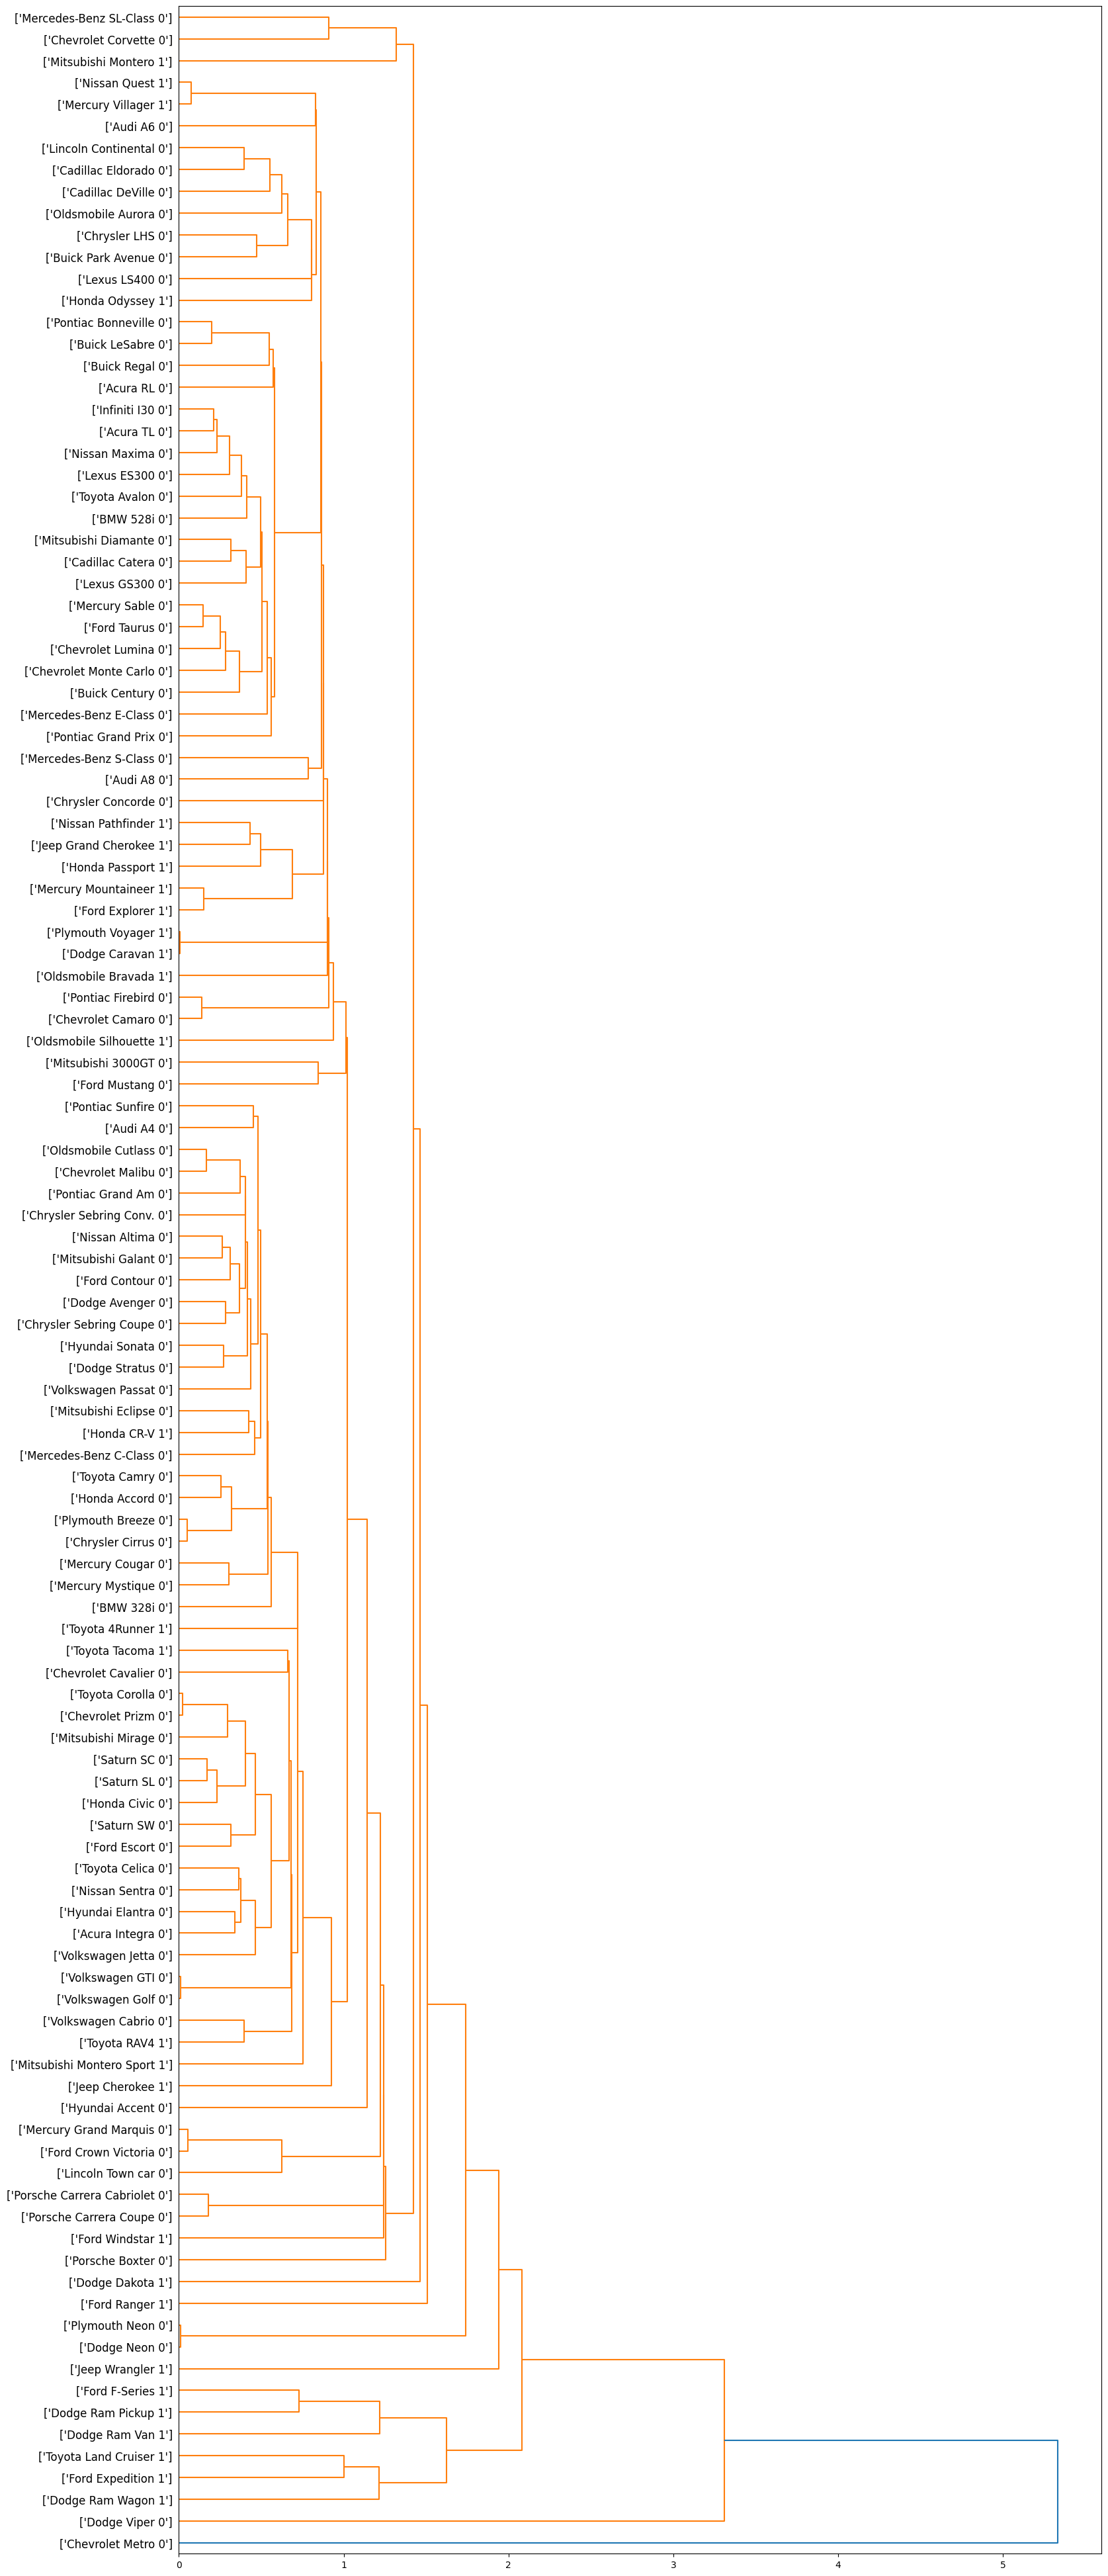

In [ ]:
import pylab
import scipy.cluster.hierarchy

# Membuat figure untuk plot dendrogram dengan ukuran 18 x 50 inci
fig = pylab.figure(figsize=(18, 50))

# Fungsi untuk menghasilkan label pada setiap daun (leaf) dalam dendrogram
# Label yang ditampilkan akan berisi informasi tentang 'manufact', 'model', dan 'type'.
# Berdasarkan data yang ada dalam dataframe 'pdf'
def llf(id):
    return ['%s %s %s' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))]

# Membuat dan menggambar dendrogram berdasarkan hasil linkage (X)
# Dengan menampilkan label pada setiap daun yang dihasilkan oleh fungsi 'llf'
# 'leaf_rotation=0' artinya label tidak diputar, tetap horizontal
# 'leaf_font_size=12' mengatur ukuran font label
# 'orientation='right'' mengatur orientasi dendrogram agar berkembang dari kiri ke kanan
dendro = hierarchy.dendrogram(X,
                              leaf_label_func=llf,
                              leaf_rotation=0,
                              leaf_font_size=12,
                              orientation='right')

# *Average Linkage*

In [ ]:
import pylab
import scipy.cluster.hierarchy

Y = hierarchy.linkage(D, 'average')

<ipython-input-22-d337df41a901>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


In [ ]:
from scipy.cluster.hierarchy import fcluster

max_d = 3

clusters = fcluster(Y, max_d, criterion='distance')

clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster

k = 5

clusters = fcluster(Y, k, criterion='maxclust')

clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

Pada awalnya menghitung jarak antar titik data, kemudian karena menggunakan average linkage maka mengelompokkan data berdasarkan jarak antar cluster yang dihitung selama proses klasterisasi. Selanjutnya menggunakan fcluster untuk membagi data ke dalan cluster berdasarkan kriteria jarak atau jumlah cluster tertentu. Pada contoh diatas, fcluster dengan max_d =3 merupakan pengelompokkan berdasarkan jaraknya lebih kecil atau sama dengan 3, kemudian pada k=5 merupakan pengelompokkan menjadi 5 cluster terpisah berdasarkan perhitungan average linkage.

**Plotting Dendogram**

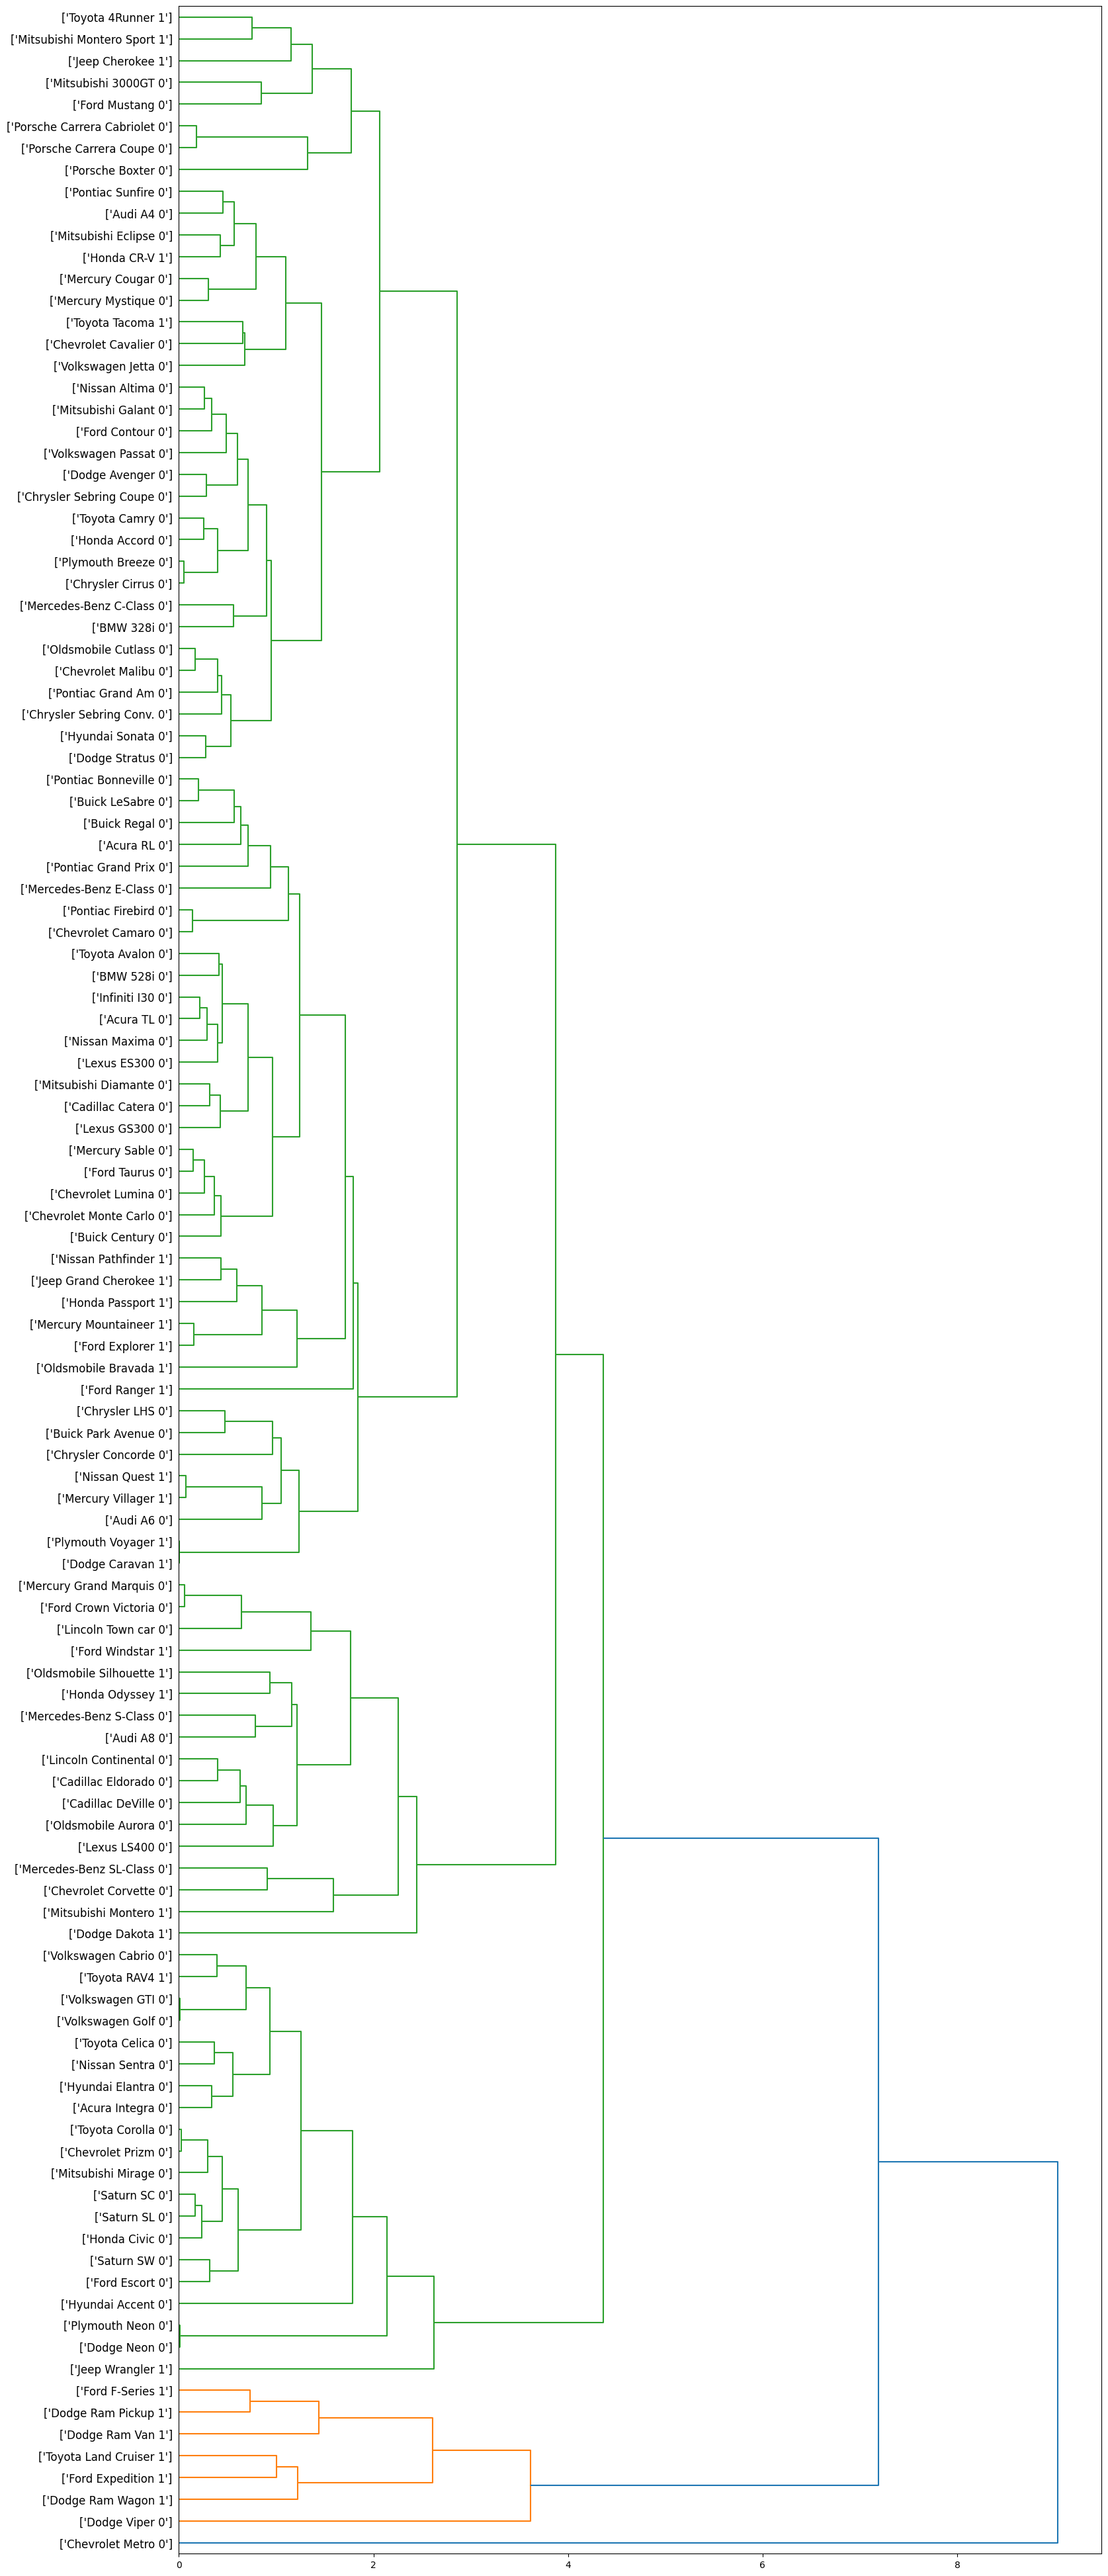

In [ ]:
import pylab
import scipy.cluster.hierarchy

# Membuat figure untuk plot dendrogram dengan ukuran 18 x 50 inci
fig = pylab.figure(figsize=(18, 50))

# Fungsi untuk menghasilkan label pada setiap daun (leaf) dalam dendrogram
# Label yang ditampilkan akan berisi informasi tentang 'manufact', 'model', dan 'type'.
# Berdasarkan data yang ada dalam dataframe 'pdf'
def llf(id):
    return ['%s %s %s' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])))]

# Membuat dan menggambar dendrogram berdasarkan hasil linkage (Y)
# Dengan menampilkan label pada setiap daun yang dihasilkan oleh fungsi 'llf'
# 'leaf_rotation=0' artinya label tidak diputar, tetap horizontal
# 'leaf_font_size=12' mengatur ukuran font label
# 'orientation='right'' mengatur orientasi dendrogram agar berkembang dari kiri ke kanan
dendro = hierarchy.dendrogram(Y,
                              leaf_label_func=llf,
                              leaf_rotation=0,
                              leaf_font_size=12,
                              orientation='right')

# **Clustering with Scikit-Learn**

Clustering with Scikit-learn merupakan teknik dalam pembelajaran mesin yang digunakan untuk mengelompokkan data ke dalam grup berdasarkan kesamaan di antara data tersebut. Ini merupakan metode unsupervised learning, di mana algoritma berusaha menemukan pola dalam data tanpa adanya label atau informasi sebelumnya mengenai kelompok yang ada.

In [ ]:
# Menghitung matriks jarak antara setiap pasangan titik dalam feature_mtx
distance_matrix = distance_matrix(feature_mtx, feature_mtx)

# Menampilkan matriks jarak yang dihitung
print(dist_matrix)

[[0.         0.34389796 0.86477941 ... 0.95213015 0.26888696 0.42566497]
 [0.34389796 0.         0.60621786 ... 0.71062652 0.50871927 0.48278431]
 [0.86477941 0.60621786 0.         ... 0.11192219 0.85340447 0.63100465]
 ...
 [0.95213015 0.71062652 0.11192219 ... 0.         0.91616173 0.67949557]
 [0.26888696 0.50871927 0.85340447 ... 0.91616173 0.         0.25576157]
 [0.42566497 0.48278431 0.63100465 ... 0.67949557 0.25576157 0.        ]]


# *Single Linkage*

In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 5 dan linkage = 'single'
agglom = AgglomerativeClustering(n_clusters=5, linkage='single')

# Melatih model clustering pada data yang ada di feature_mtx
agglom.fit(feature_mtx)

# Menampilkan label kluster untuk setiap titik data
labels = agglom.labels_

# Label Cluster
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,1
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,1
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,1


Dilakukan klasterisasi dengan teknik single linkage untuk membagi dataset menjadi 5 cluster

<ipython-input-28-cd7734a58104>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

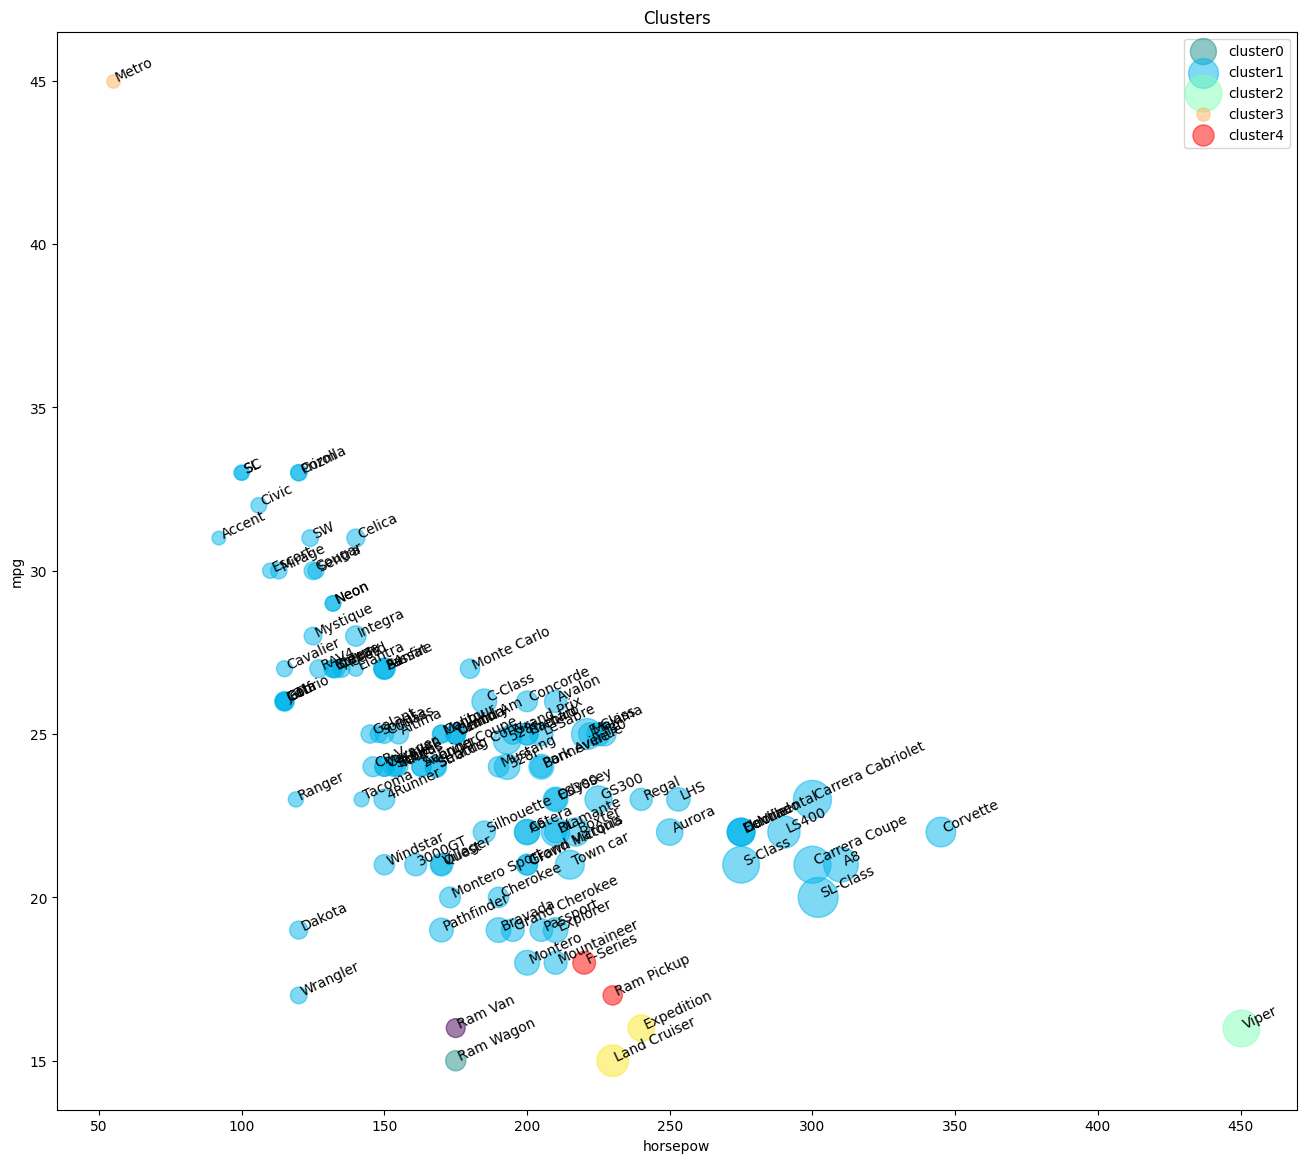

In [ ]:
# Mengimpor colormap rainbow untuk memberikan warna berbeda pada setiap kluster
import matplotlib.cm as cm

# Menentukan jumlah kluster berdasarkan label yang dihasilkan oleh AgglomerativeClustering
n_clusters = max(agglom.labels_) + 1

# Membuat array warna untuk setiap kluster menggunakan colormap 'rainbow'
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label kluster dari 0 hingga jumlah kluster-1
cluster_labels = list(range(0, n_clusters))

# Membuat figure dengan ukuran 16x14 inci untuk plot
plt.figure(figsize=(16, 14))

# Iterasi untuk setiap kluster, warna, dan label kluster
for color, label in zip(colors, cluster_labels):
    # Memilih subset data berdasarkan label kluster
    subset = pdf[pdf.cluster_ == label]

    # Menambahkan teks model mobil untuk setiap titik data dalam subset
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)

    # Menampilkan titik data dalam subset dengan warna dan ukuran berdasarkan harga
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

# Menambahkan legenda untuk membedakan kluster
plt.legend()

# Menambahkan judul dan label pada sumbu x dan y
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Selanjutnya dilakukan visualisasi hasil klasterisasi pada dataset yang telah dibagi menjadi beberapa cluster. Seperti pada diatas menunjukkan hasil visualisasi berdasarkan 2 fitur, yaitu horsepow(horsepower) dan mpg(miles per gallon). Setiap titik data digambarkan dengan plot dengan 2 sumbu, yaitu horsepow pada sumbu x dan mpg pada sumbu y.

In [ ]:
#Mengelompokkan data berdasarkan kolom 'cluster_' (klaster) dan 'type' (tipe kendaraan)
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         1.0      4
1         0.0     86
          1.0     23
2         0.0      1
3         0.0      1
4         1.0      2
Name: cluster_, dtype: int64

In [ ]:
# Mengelompokkan data berdasarkan 2 kolom yaitu 'cluster_' dan 'type'
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()

#Menampilkan hasilnya agar kita dapat melihat hasil agregasi berdasarkan kombinasi klaster dan tipe kendaraan
agg_cars

horsepow  engine_s       mpg      price
cluster_ type                                           
0        1.0   205.000000  4.275000  15.50000  31.938250
1        0.0   181.197674  2.902326  25.35814  26.286779
         1.0   167.478261  3.095652  21.00000  22.811261
2        0.0   450.000000  8.000000  16.00000  69.725000
3        0.0    55.000000  1.000000  45.00000   9.235000
4        1.0   225.000000  4.900000  17.50000  23.197500

<ipython-input-31-07e4c18047c9>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2],
<ipython-input-31-07e4c18047c9>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-31-07e4c18047c9>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

Text(0, 0.5, 'mpg')

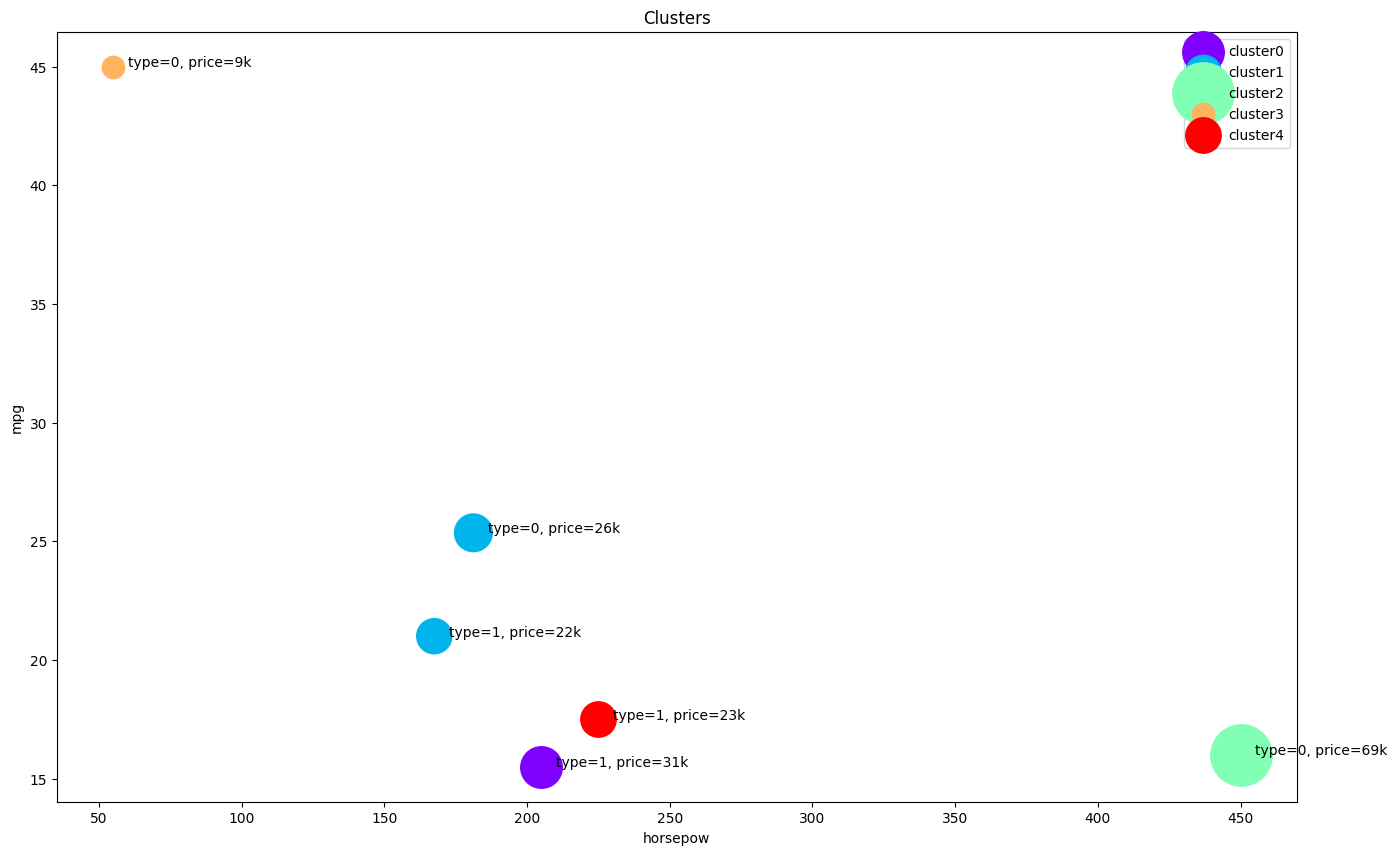

In [ ]:
plt.figure(figsize=(16,10)) #Membuat figure dengan ukuran 16x10 inci
# Loop untuk setiap kombinasi warna dan label kluster
for color, label in zip(colors, cluster_labels):
    # Menyaring subset data berdasarkan kluster (label) dan mengambil data rata-rata dari setiap kluster
    subset = agg_cars.loc[(label,),]

    # Loop untuk setiap indeks dalam subset dan menambahkan teks pada plot
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2],
                 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')

    # Menampilkan scatter plot untuk setiap kluster, menggunakan horsepower sebagai x-axis dan mpg sebagai y-axis
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*28, c=color, label='cluster'+str(label))

# Menambahkan legend untuk memudahkan identifikasi
plt.legend()

# Menambahkan judul untuk plot
plt.title('Clusters')

# Menambahkan label untuk sumbu x dan y
plt.xlabel('horsepow')
plt.ylabel('mpg')

Pada penjelasan dan gambar diatas, dapat dilihat setelah dilakukan klasterisasi kemudain dilakukan pengelompokkan lagi ke dalam beberapa kluster. Custer yang berdekatan digabung dan dikelompokkan berdasarkan 2 atribur yaitu horsepow dan mpg, serta terdapat informasi seperti harga dan jenis mobil yang tertera pada visualisasi diatas.

# *Average Linkage*

In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 6 dan linkage = 'average'
agglom = AgglomerativeClustering(n_clusters=6, linkage='average')

# Melatih model clustering pada data yang ada di feature_mtx
agglom.fit(feature_mtx)

# Menampilkan label kluster untuk setiap titik data
labels = agglom.labels_

# Label Cluster
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0,4
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0,4
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0,4


Dilakukan klasterisasi dengan teknik average linkage untuk membagi dataset menjadi 6 cluster

<ipython-input-33-cd7734a58104>:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

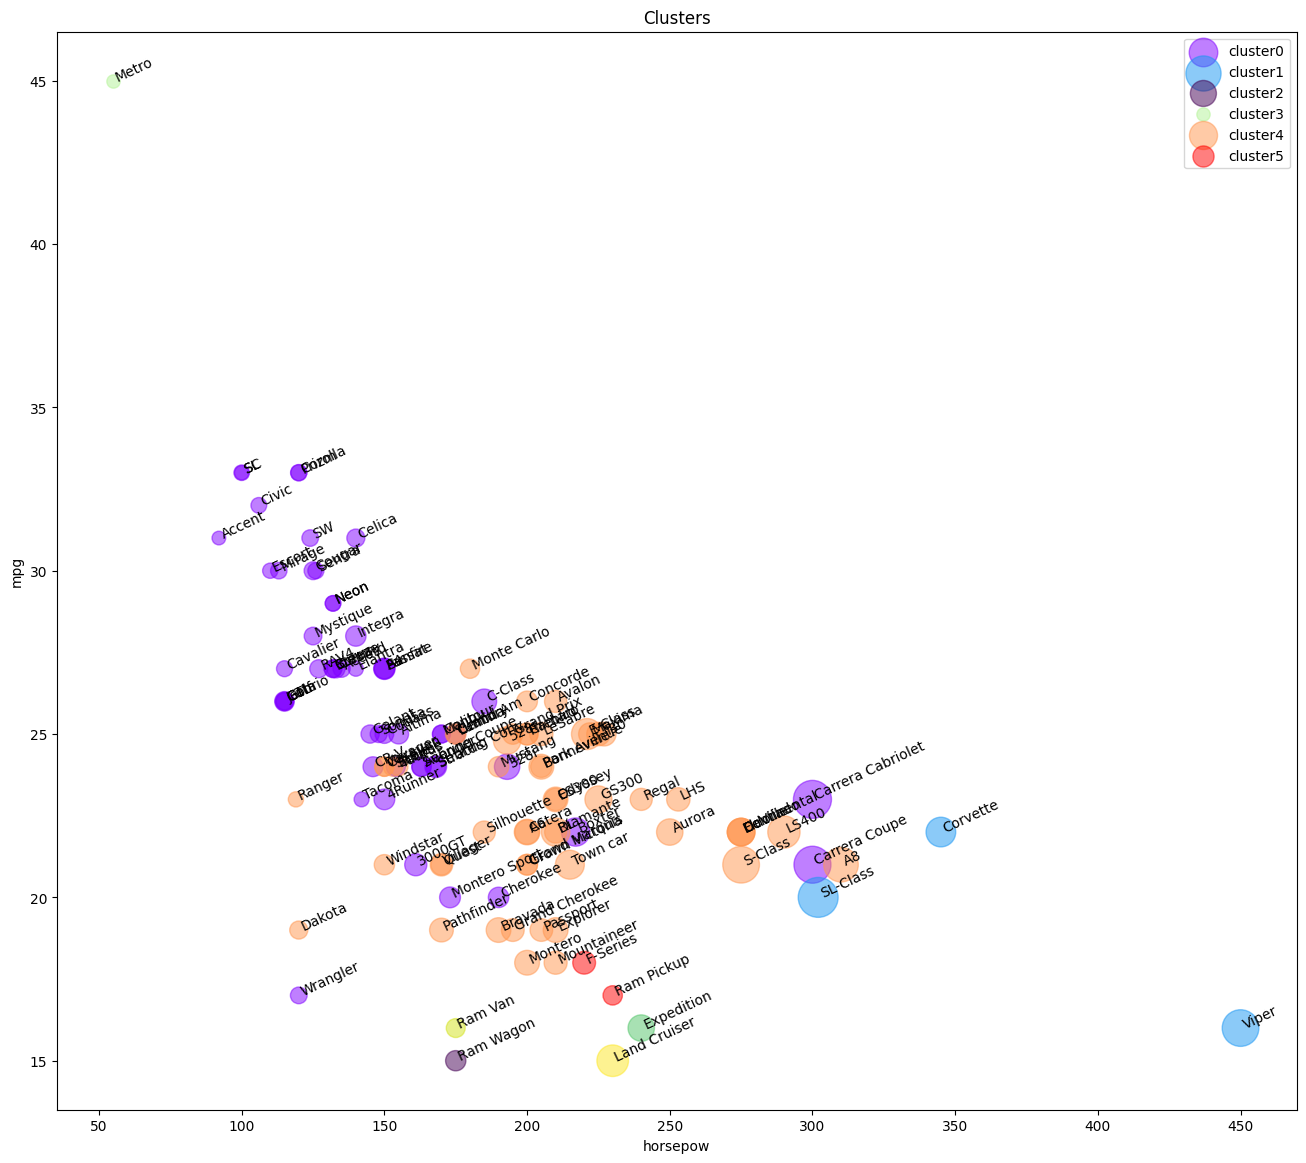

In [ ]:
# Mengimpor colormap rainbow untuk memberikan warna berbeda pada setiap kluster
import matplotlib.cm as cm

# Menentukan jumlah kluster berdasarkan label yang dihasilkan oleh AgglomerativeClustering
n_clusters = max(agglom.labels_) + 1

# Membuat array warna untuk setiap kluster menggunakan colormap 'rainbow'
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label kluster dari 0 hingga jumlah kluster-1
cluster_labels = list(range(0, n_clusters))

# Membuat figure dengan ukuran 16x14 inci untuk plot
plt.figure(figsize=(16, 14))

# Iterasi untuk setiap kluster, warna, dan label kluster
for color, label in zip(colors, cluster_labels):
    # Memilih subset data berdasarkan label kluster
    subset = pdf[pdf.cluster_ == label]

    # Menambahkan teks model mobil untuk setiap titik data dalam subset
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)

    # Menampilkan titik data dalam subset dengan warna dan ukuran berdasarkan harga
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

# Menambahkan legenda untuk membedakan kluster
plt.legend()

# Menambahkan judul dan label pada sumbu x dan y
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Selanjutnya dilakukan visualisasi hasil klasterisasi pada dataset yang telah dibagi menjadi beberapa cluster. Seperti pada diatas menunjukkan hasil visualisasi berdasarkan 2 fitur, yaitu horsepow(horsepower) dan mpg(miles per gallon). Setiap titik data digambarkan dengan plot dengan 2 sumbu, yaitu horsepow pada sumbu x dan mpg pada sumbu y.

In [ ]:
#Mengelompokkan data berdasarkan kolom 'cluster_' (klaster) dan 'type' (tipe kendaraan)
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

In [ ]:
# Mengelompokkan data berdasarkan 2 kolom yaitu 'cluster_' dan 'type'
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()

#Menampilkan hasilnya agar kita dapat melihat hasil agregasi berdasarkan kombinasi klaster dan tipe kendaraan
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

<ipython-input-36-07e4c18047c9>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2],
<ipython-input-36-07e4c18047c9>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-36-07e4c18047c9>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value

Text(0, 0.5, 'mpg')

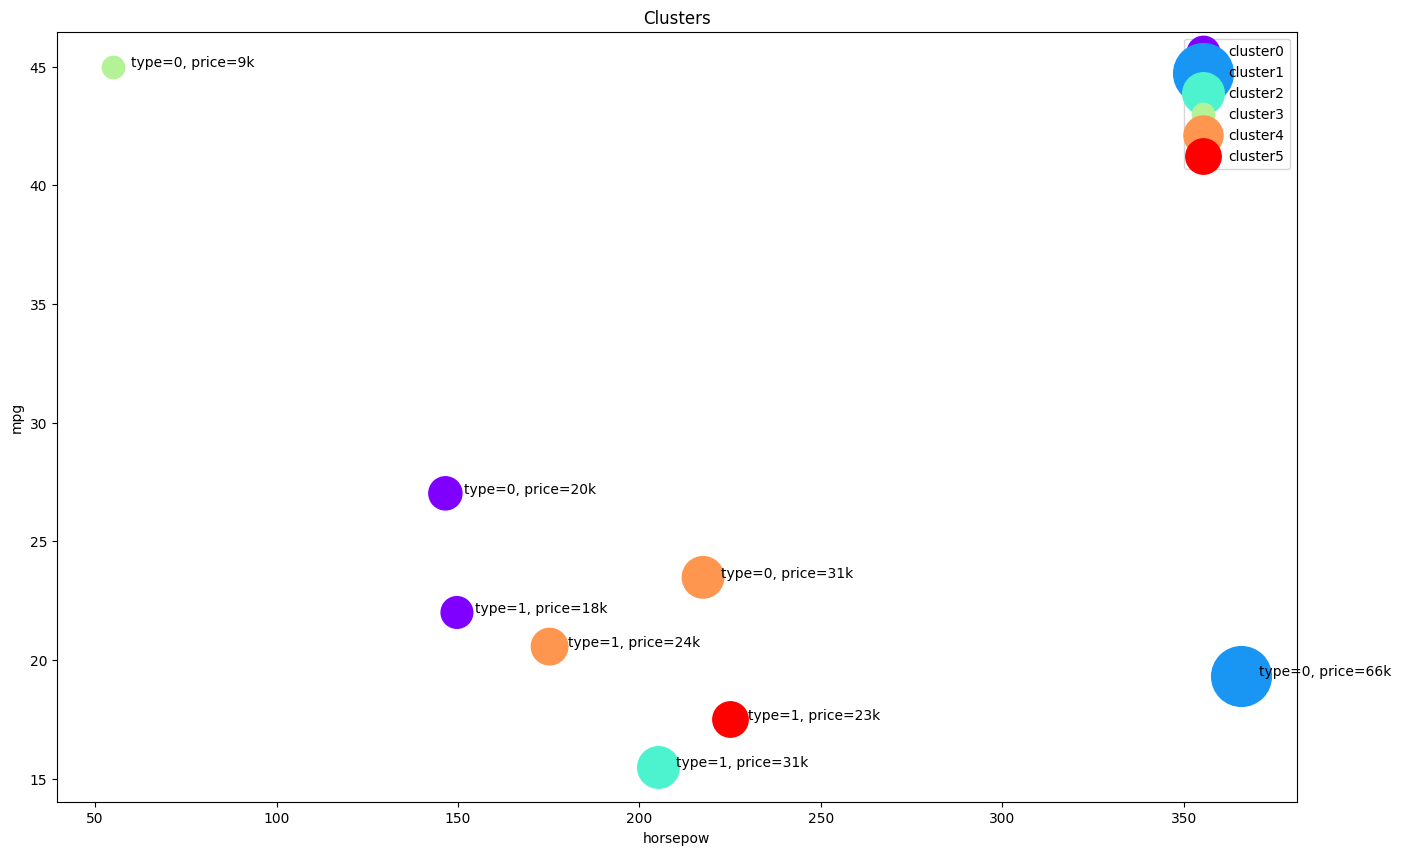

In [ ]:
plt.figure(figsize=(16,10)) #Membuat figure dengan ukuran 16x10 inci
# Loop untuk setiap kombinasi warna dan label kluster
for color, label in zip(colors, cluster_labels):
    # Menyaring subset data berdasarkan kluster (label) dan mengambil data rata-rata dari setiap kluster
    subset = agg_cars.loc[(label,),]

    # Loop untuk setiap indeks dalam subset dan menambahkan teks pada plot
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2],
                 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')

    # Menampilkan scatter plot untuk setiap kluster, menggunakan horsepower sebagai x-axis dan mpg sebagai y-axis
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*28, c=color, label='cluster'+str(label))

# Menambahkan legend untuk memudahkan identifikasi
plt.legend()

# Menambahkan judul untuk plot
plt.title('Clusters')

# Menambahkan label untuk sumbu x dan y
plt.xlabel('horsepow')
plt.ylabel('mpg')

Pada penjelasan dan gambar diatas, dapat dilihat setelah dilakukan klasterisasi kemudain dilakukan pengelompokkan lagi ke dalam beberapa kluster. Custer yang berdekatan digabung dan dikelompokkan berdasarkan 2 atribur yaitu horsepow dan mpg, serta terdapat informasi seperti harga dan jenis mobil yang tertera pada visualisasi diatas.

# **Perbedaan Agglomerative clustering menggunakan scipy dan Agglomerative clustering menggunakan scikit-learn**

1. Cara visualisasi
*   Pada scipy menyediakan kemampuan visualisasi yang lebih baik melalui dendrogram, yang membantu dalam menentukan jumlah cluster dengan cara memotong pohon pada tingkat tertentu. Ini memungkinkan analisis visual yang mendalam terhadap struktur data
*   Sedangkan pada Scikit-learn tidak secara langsung menyediakan alat untuk visualisasi dendrogram. Pengguna harus mengandalkan SciPy atau alat lain untuk visualisasi setelah melakukan clustering dengan scikit-learn
2. Penggunaan
*   SciPy lebih fleksibel dalam hal pemilihan metode pengukuran jarak dan kriteria penggabungan. Terdapat berbagai pilihan seperti "single", "complete", "average", dan "ward", serta dukungan untuk berbagai metrik jarak
*   Pada Scikit-learn pilihan lebih terbatas dibandingkan dengan SciPy. Namun, scikit-learn memberikan kemudahan integrasi dengan pipeline machine learning lainnya, membuatnya lebih cocok untuk aplikasi yang memerlukan preprocessing atau evaluasi model.



## 3. Lakukan Agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset iris! Jelaskan perbedaannya!

**Read data**

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length','petal-width', 'class']
data = pd.read_csv(url, header=None, names=names)

In [ ]:
data.head(200)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Data Cleaning**

In [ ]:
print ("Shape of dataset before cleaning: ", data.size)

# Mengonversi kolom fitur menjadi numerik, dengan 'coerce' untuk menangani nilai yang tidak valid
data[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']] = data[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris dengan nilai NaN
data = data.dropna()

# Reset indeks setelah penghapusan NaN
data = data.reset_index(drop=True)

# Menampilkan ukuran dataset setelah pembersihan
print("Shape of dataset after cleaning: ", data.size)
print(data.head(5))

Shape of dataset before cleaning:  750
Shape of dataset after cleaning:  750
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Bertujuan untuk menghapus dataset dengan membuang baris yang memiliki nilai null.

**Feature Selection**

In [ ]:
featureset1 = data[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']]

**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

y = featureset1.values  # returns a numpy array

minmaxscaler = MinMaxScaler()
featureiris = minmaxscaler.fit_transform(y)

featureiris[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

Tujuan dilakukan normalisasi pada dataset adalah untuk menskalakan fitur-fitur numerik agar memiliki rentang nilai yang sama. Pada kode diatas penggunaan MinMaxScaler digunakan untuk mengubah nilai fitur-fitur dalam dataset ke dalam rentang antara 0 dan 1.

# **Clustering with Scipy**

Clustering dengan SciPy merupakan teknik dalam pembelajaran mesin dan ilmu data yang digunakan untuk mengelompokkan data yang serupa ke dalam kelompok atau cluster. Tujuan dari clustering adalah untuk menemukan pola dan struktur dalam data yang mungkin tidak terlihat secara langsung, serta mengelompokkan titik data yang terkait untuk analisis lebih lanjut

In [ ]:
import scipy
#Panjang dataset
leng = featureiris.shape[0]
#Membuat matriks 0
I = np.zeros([leng, leng])

#menghitung jarak euclidean
for i in range(leng):
    for j in range(leng):
      #matriks 0 berisi jarak euclidean antara semua pasangan data
        I[i, j] = scipy.spatial.distance.euclidean(featureiris[i], featureiris[j])

# *Single Linkage*

In [ ]:
import pylab
import scipy.cluster.hierarchy

A = hierarchy.linkage(I, 'single')

<ipython-input-44-cca5f1620ce5>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  A = hierarchy.linkage(I, 'single')


In [ ]:
from scipy.cluster.hierarchy import fcluster

max_d = 3

clusters = fcluster(A, max_d, criterion='distance')

clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster

k = 5

clusters = fcluster(A, k, criterion='maxclust')

clusters

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Pada awalnya menghitung jarak antar titik data, kemudian karena menggunakan single linkage maka mencari data paling dekat untuk membangun struktur cluster hirarkis. Selanjutnya menggunakan fcluster untuk membagi data ke dalan cluster berdasarkan kriteria jarak atau jumlah cluster tertentu. Pada contoh diatas, fcluster dengan max_d =3 merupakan pengelompokkan berdasarkan jarak maksimal 3, kemudian pada k=5 merupakan pengelompokkan menjadi 5 cluster terpisah berdasarkan jumlah klaster yang diinginkan.

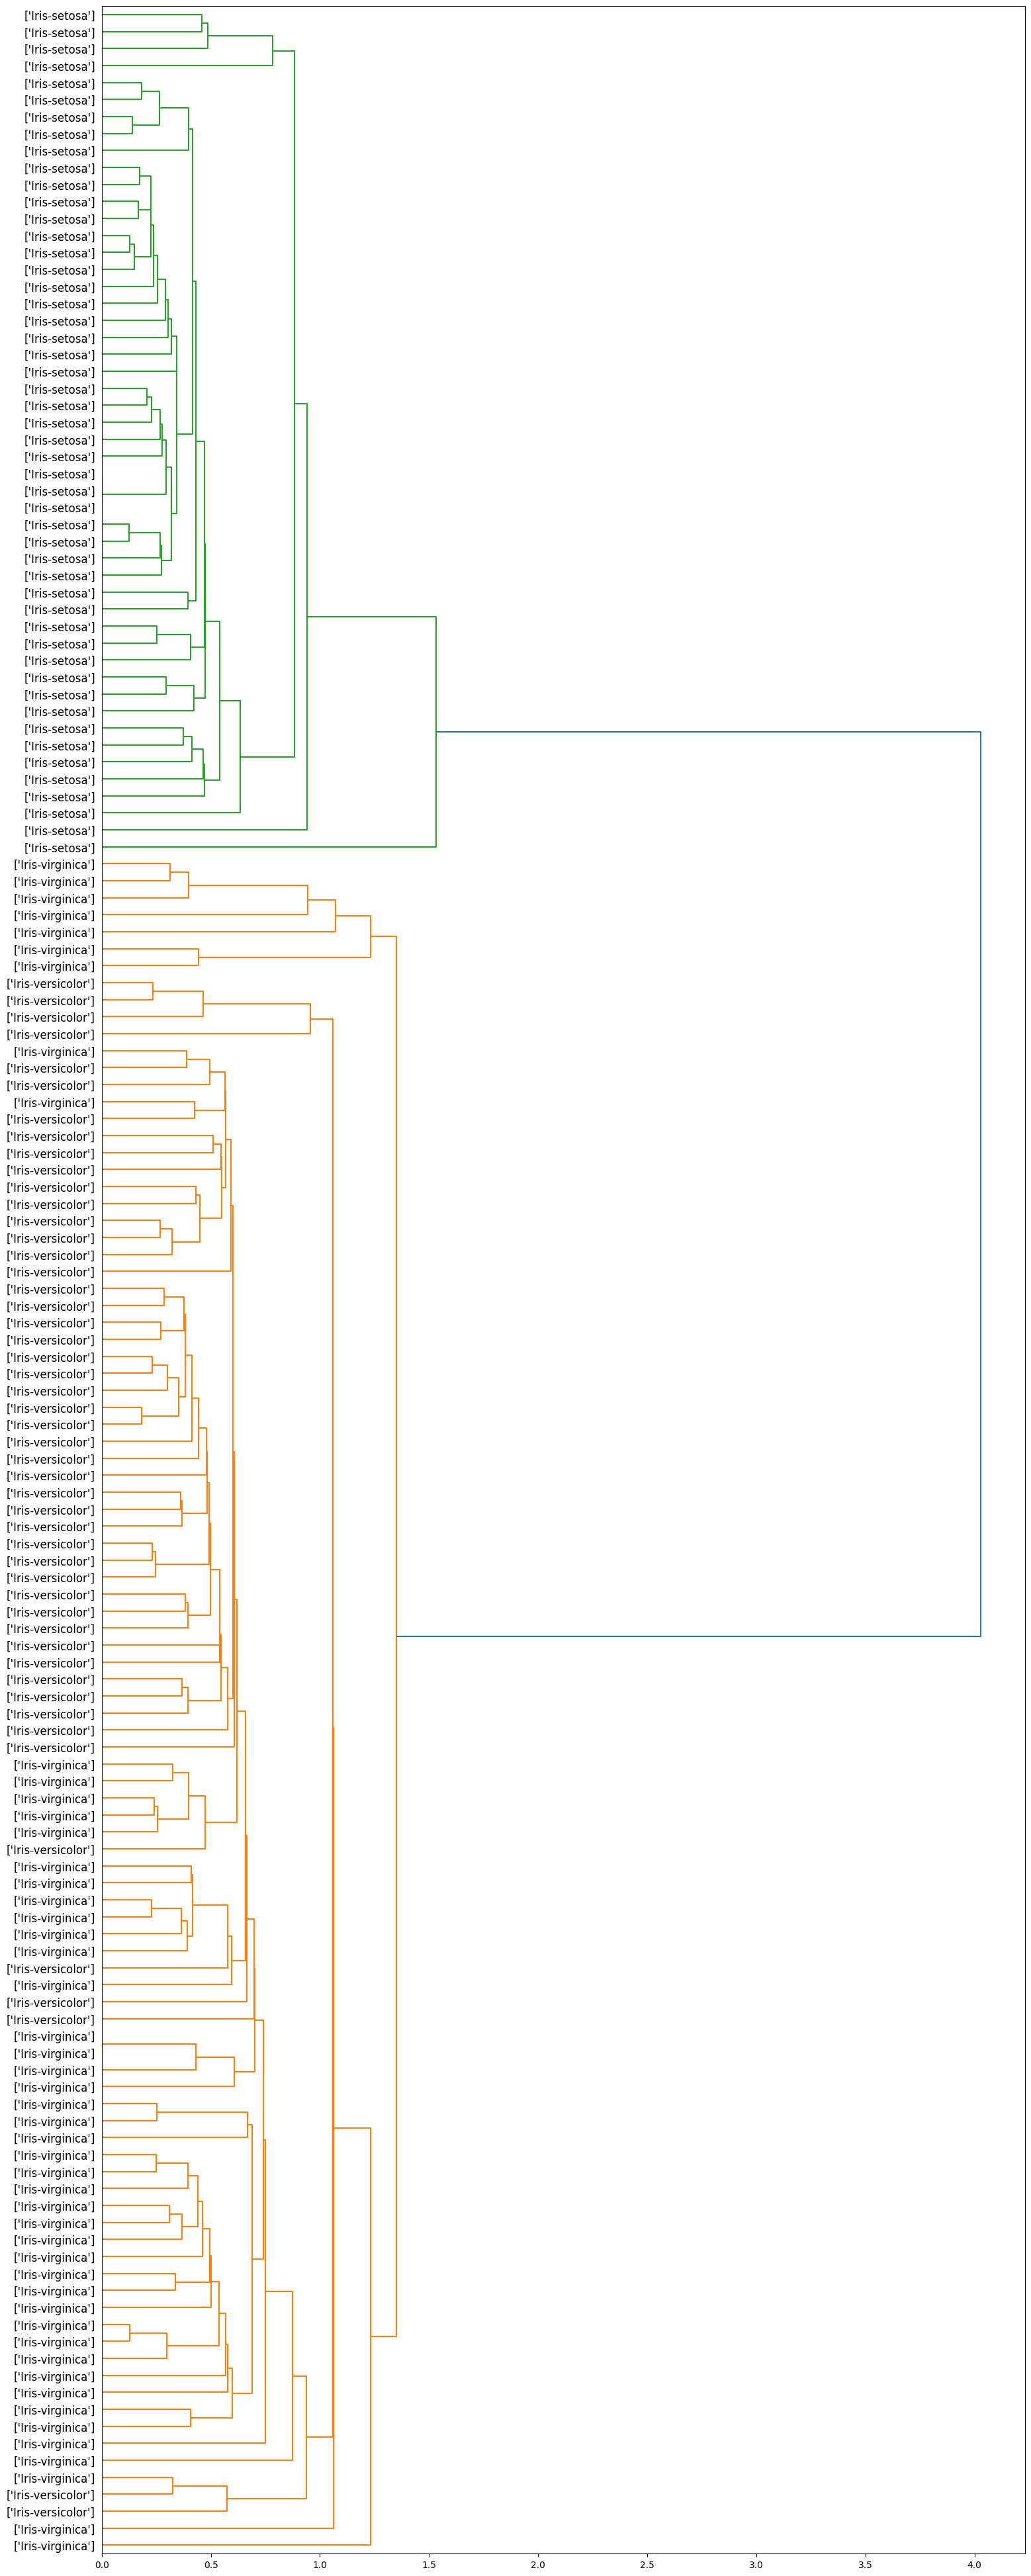

In [ ]:
import pylab
import scipy.cluster.hierarchy

# Membuat figure untuk plot dendrogram dengan ukuran 18 x 50 inci
fig = pylab.figure(figsize=(18, 50))

# Fungsi untuk menghasilkan label pada setiap daun (leaf) dalam dendrogram
# Label yang ditampilkan akan berisi informasi tentang 'manufact', 'model', dan 'type'.
# Berdasarkan data yang ada dalam dataframe 'pdf'
def llf(id):
    return ['%s' % (data['class'][id])]

# Membuat dan menggambar dendrogram berdasarkan hasil linkage (A)
# Dengan menampilkan label pada setiap daun yang dihasilkan oleh fungsi 'llf'
# 'leaf_rotation=0' artinya label tidak diputar, tetap horizontal
# 'leaf_font_size=12' mengatur ukuran font label
# 'orientation='right'' mengatur orientasi dendrogram agar berkembang dari kiri ke kanan
dendro = hierarchy.dendrogram(A,
                              leaf_label_func=llf,
                              leaf_rotation=0,
                              leaf_font_size=12,
                              orientation='right')

# *Average Linkage*

In [ ]:
import pylab
import scipy.cluster.hierarchy

B = hierarchy.linkage(I, 'average')

<ipython-input-49-23811ded6e3b>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  B = hierarchy.linkage(I, 'average')


In [ ]:
from scipy.cluster.hierarchy import fcluster

max_d = 3

clusters = fcluster(B, max_d, criterion='distance')

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

In [ ]:
from scipy.cluster.hierarchy import fcluster

k = 5

clusters = fcluster(B, k, criterion='maxclust')

clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5, 4, 5, 4,
       4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 4, 4,
       5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 2, 4, 2, 4, 2, 3, 4, 2, 2, 3,
       4, 4, 2, 4, 2, 2, 4, 3, 3, 4, 2, 4, 3, 4, 2, 2, 4, 4, 2, 2, 2, 3,
       2, 4, 4, 3, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4], dtype=int32)

Pada awalnya menghitung jarak antar titik data, kemudian karena menggunakan average linkage maka mengelompokkan data berdasarkan jarak antar cluster yang dihitung selama proses klasterisasi. Selanjutnya menggunakan fcluster untuk membagi data ke dalan cluster berdasarkan kriteria jarak atau jumlah cluster tertentu. Pada contoh diatas, fcluster dengan max_d =3 merupakan pengelompokkan berdasarkan jaraknya lebih kecil atau sama dengan 3, kemudian pada k=5 merupakan pengelompokkan menjadi 5 cluster terpisah berdasarkan perhitungan average linkage.

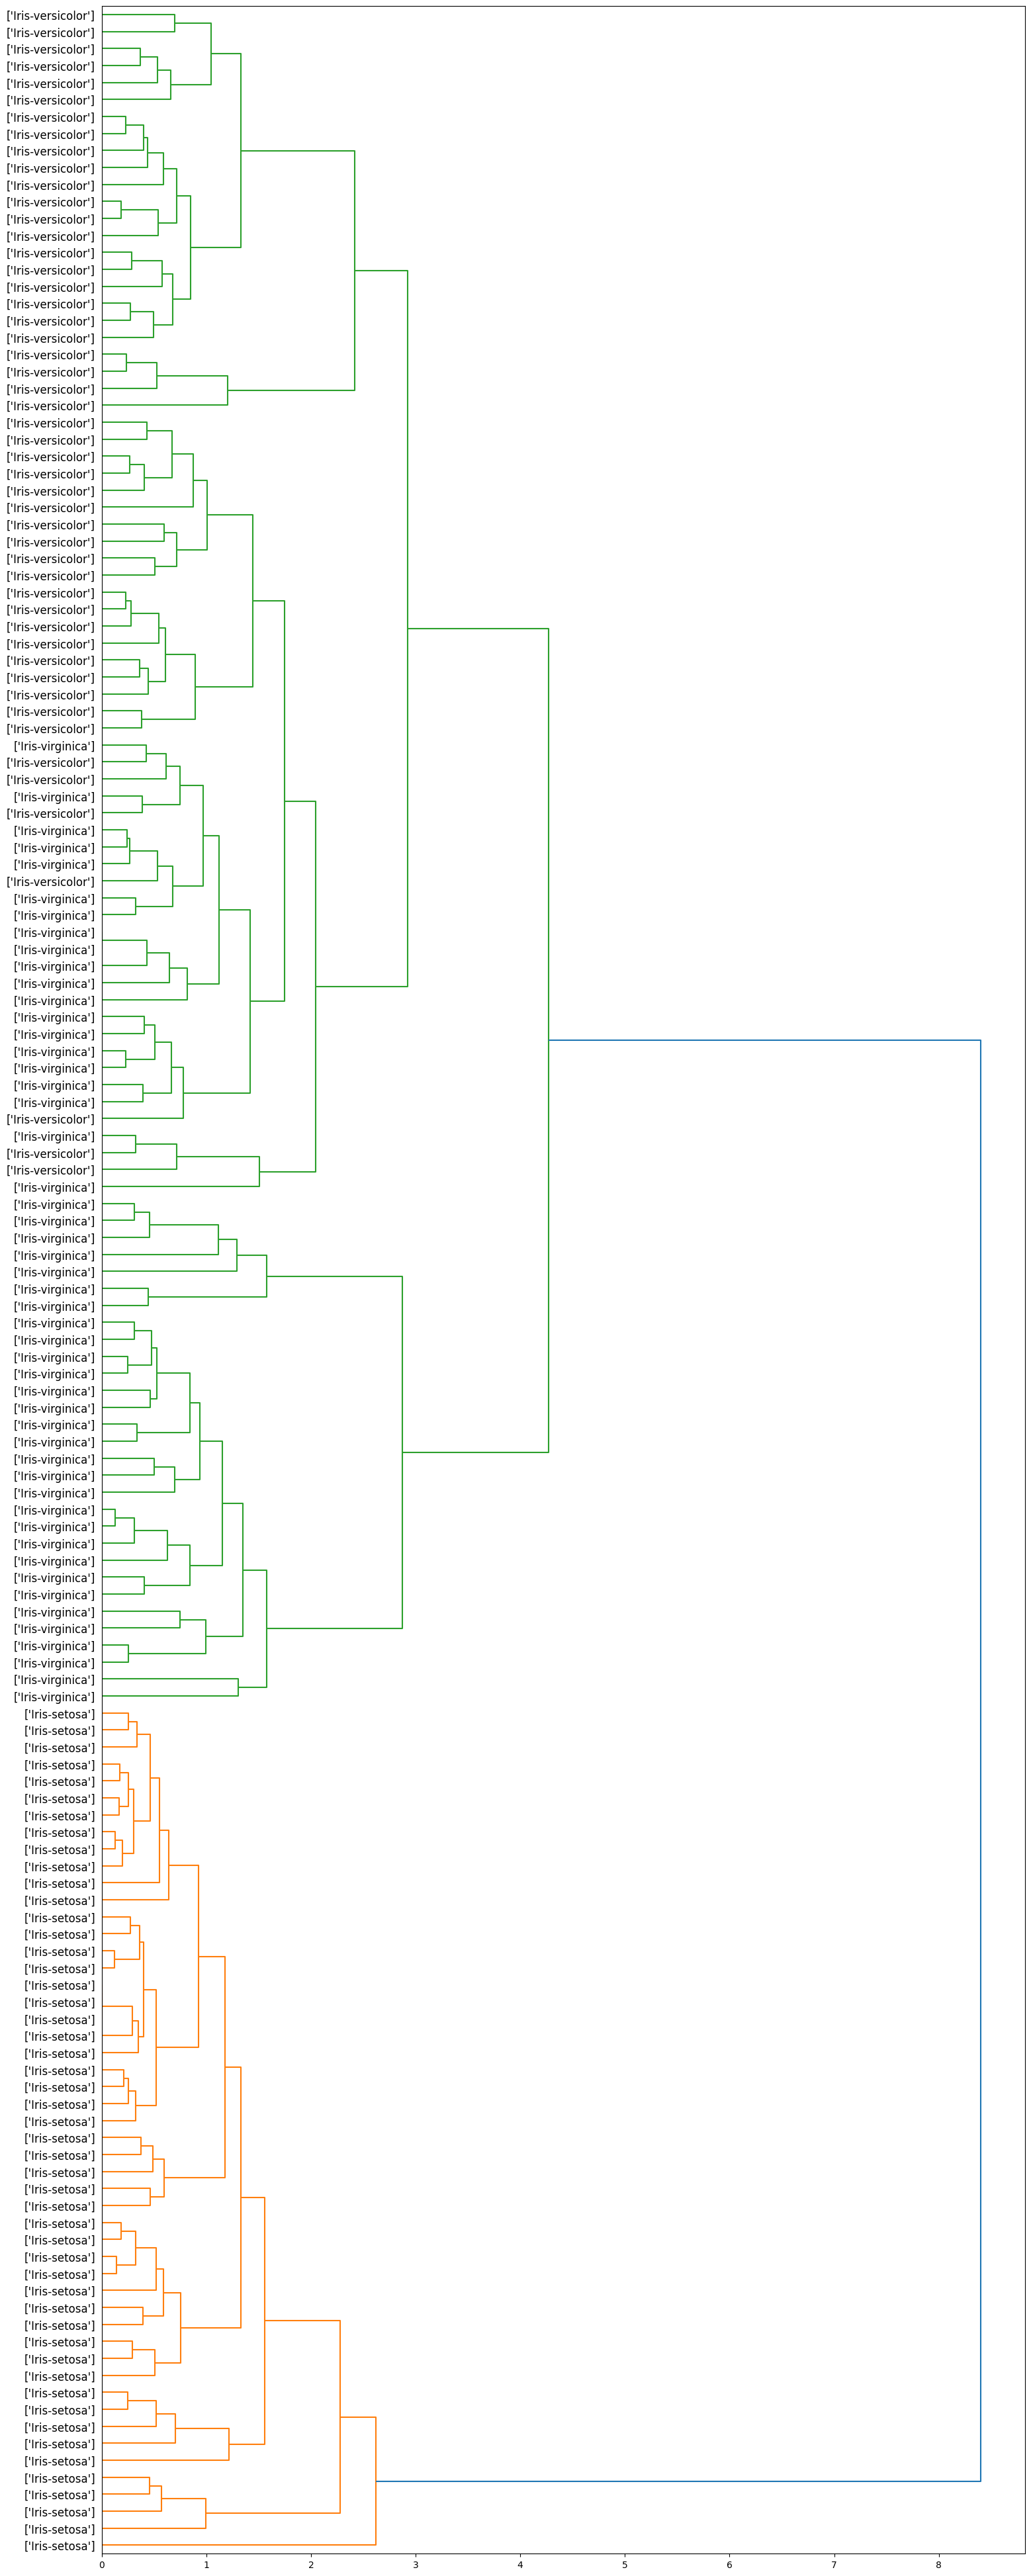

In [ ]:
import pylab
import scipy.cluster.hierarchy

# Membuat figure untuk plot dendrogram dengan ukuran 18 x 50 inci
fig = pylab.figure(figsize=(18, 50))

# Fungsi untuk menghasilkan label pada setiap daun (leaf) dalam dendrogram
# Label yang ditampilkan akan berisi informasi tentang 'manufact', 'model', dan 'type'.
# Berdasarkan data yang ada dalam dataframe 'pdf'
def llf(id):
    return ['%s' % (data['class'][id])]

# Membuat dan menggambar dendrogram berdasarkan hasil linkage (A)
# Dengan menampilkan label pada setiap daun yang dihasilkan oleh fungsi 'llf'
# 'leaf_rotation=0' artinya label tidak diputar, tetap horizontal
# 'leaf_font_size=12' mengatur ukuran font label
# 'orientation='right'' mengatur orientasi dendrogram agar berkembang dari kiri ke kanan
dendro = hierarchy.dendrogram(B,
                              leaf_label_func=llf,
                              leaf_rotation=0,
                              leaf_font_size=12,
                              orientation='right')

# **Clustering with Scikit-Learn**

Clustering with Scikit-learn merupakan teknik dalam pembelajaran mesin yang digunakan untuk mengelompokkan data ke dalam grup berdasarkan kesamaan di antara data tersebut. Ini merupakan metode unsupervised learning, di mana algoritma berusaha menemukan pola dalam data tanpa adanya label atau informasi sebelumnya mengenai kelompok yang ada.

In [ ]:
from scipy.spatial import distance_matrix

# Menghitung matriks jarak antara setiap pasangan titik dalam feature_mtx
dist_matrix = distance_matrix(featureiris, featureiris)

# Menampilkan matriks jarak yang dihitung
print(dist_matrix)

[[0.         0.21561354 0.16810102 ... 1.08257132 1.14907064 0.96462829]
 [0.21561354 0.         0.10157824 ... 1.08390691 1.17619813 0.95649502]
 [0.16810102 0.10157824 0.         ... 1.12088708 1.19544459 0.98859665]
 ...
 [1.08257132 1.08390691 1.12088708 ... 0.         0.226928   0.18710825]
 [1.14907064 1.17619813 1.19544459 ... 0.226928   0.         0.28409587]
 [0.96462829 0.95649502 0.98859665 ... 0.18710825 0.28409587 0.        ]]


# *Single Linkage*

In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 6 dan linkage = 'single'
agglo = AgglomerativeClustering(n_clusters=6, linkage='single')

# Melatih model clustering pada data yang ada di featureiris
agglo.fit(featureiris)

# Menampilkan label kluster untuk setiap titik data
labels = agglo.labels_
print(agglo.labels_)

data['cluster_'] = agglo.labels_
data.head()


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 5 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


,sepal-length,sepal-width,petal-length,petal-width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5.0,3.6,1.4,0.2,Iris-setosa,2


Melakukan Agglomerative clustering dengan mengelompokkan dataset Iris menjadi 6 cluster menggunakan single linkage. Kemudian model dilatih dan label cluster ditambahkan ke dataset untuk menunjukkan hasil pengelompokkan.

# *Average Linkage*

In [ ]:
# Membuat objek AgglomerativeClustering dengan parameter n_clusters = 6 dan linkage = 'single'
agglo = AgglomerativeClustering(n_clusters=6, linkage='average')

# Melatih model clustering pada data yang ada di featureiris
agglo.fit(featureiris)

# Menampilkan label kluster untuk setiap titik data
labels = agglo.labels_
print(agglo.labels_)

data['cluster_'] = agglo.labels_
data.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 2 4 1 4 1 1 1 1 2 1 4 5 1
 4 1 4 4 1 1 5 1 4 1 4 1 4 1 1 4 4 1 1 1 5 1 4 4 1 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


,sepal-length,sepal-width,petal-length,petal-width,class,cluster_
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


Melakukan Agglomerative clustering dengan mengelompokkan dataset Iris menjadi 6 cluster menggunakan average linkage. Kemudian model dilatih dan label cluster ditambahkan ke dataset untuk menunjukkan hasil pengelompokkan.

<ipython-input-61-77e6b9669ba6>:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['sepal-length'], subset['sepal-width'], c=color, label='cluster ' + str(label), alpha=0.5)


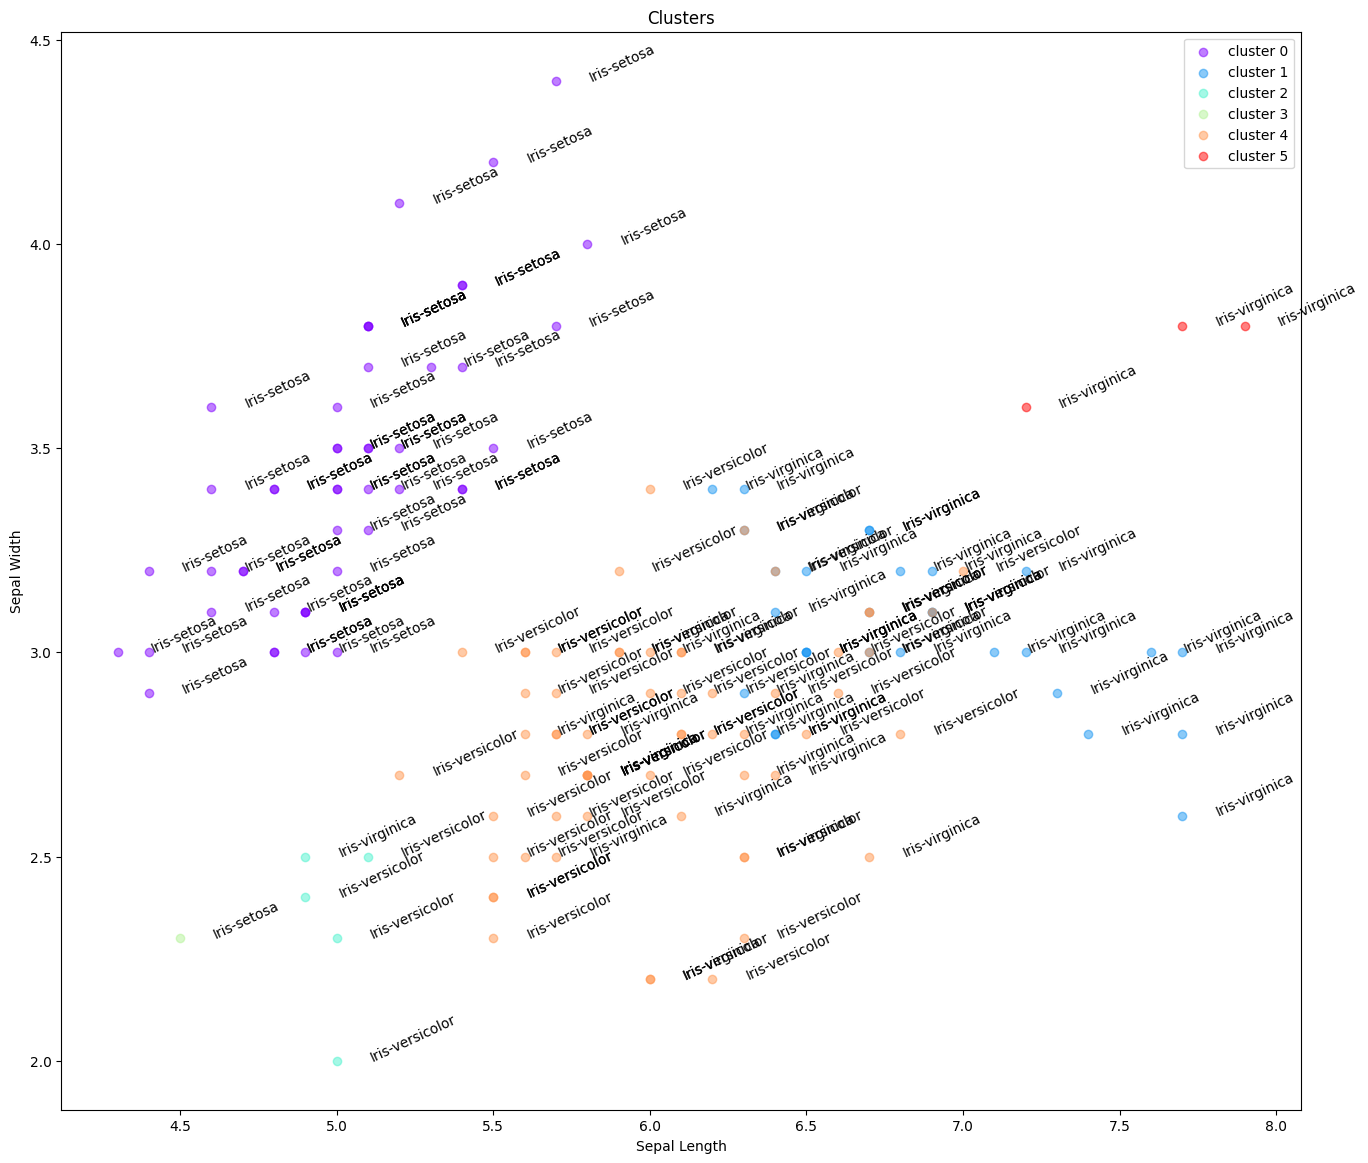

In [ ]:
# Menentukan jumlah kluster berdasarkan label yang dihasilkan oleh AgglomerativeClustering
n_clusters = max(agglo.labels_) + 1  # Pastikan agglo adalah objek AgglomerativeClustering

# Membuat array warna untuk setiap kluster menggunakan colormap 'rainbow'
colors = cm.rainbow(np.linspace(0, 1, n_clusters))

# Membuat daftar label kluster dari 0 hingga jumlah kluster-1
cluster_labels = list(range(0, n_clusters))

# Menambahkan kolom 'cluster_' ke data untuk klaster yang dihasilkan oleh AgglomerativeClustering
data['cluster_'] = agglo.labels_

# Membuat figure dengan ukuran 16x14 inci untuk plot
plt.figure(figsize=(16, 14))

# Iterasi untuk setiap kluster, warna, dan label kluster
for color, label in zip(colors, cluster_labels):
    # Memilih subset data berdasarkan label kluster
    subset = data[data.cluster_ == label]

    # Menambahkan teks model mobil untuk setiap titik data dalam subset
    for i in range(len(subset)):  # Menggunakan range untuk menghindari out of bounds
        # Menambahkan teks (misalnya, nama model) pada setiap titik
        # Gantilah subset.iloc[i, 0] dengan kolom yang relevan untuk x dan y (misalnya sepal-length, sepal-width)
        plt.text(subset.iloc[i, 0] + 0.1, subset.iloc[i, 1], str(subset['class'].iloc[i]), rotation=25)

    # Menampilkan titik data dalam subset dengan warna dan ukuran berdasarkan harga
    plt.scatter(subset['sepal-length'], subset['sepal-width'], c=color, label='cluster ' + str(label), alpha=0.5)

# Menambahkan legenda untuk membedakan kluster
plt.legend()

# Menambahkan judul dan label pada sumbu x dan y
plt.title('Clusters')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Merupakan visualisasu cluster yang dihasilkan oleh model Agglomerative Clustering pada dataset. Data dipisahkan berdasarkan kluster dan ditampilkan dalam plot 2D dengan dua fitur: sepal-length dan sepal-width. Setiap kluster diberi warna berbeda, dan teks ditambahkan pada setiap titik untuk menunjukkan kelasnya.

In [ ]:
data.groupby(['cluster_', 'class'])['cluster_'].count()

cluster_  class          
0         Iris-setosa        49
1         Iris-virginica     30
2         Iris-versicolor     4
          Iris-virginica      1
3         Iris-setosa         1
4         Iris-versicolor    46
          Iris-virginica     16
5         Iris-virginica      3
Name: cluster_, dtype: int64

In [ ]:
# Mengelompokkan data berdasarkan 2 kolom yaitu 'cluster_' dan 'class'
agglo = data.groupby(['cluster_', 'class'])[['sepal-length', 'sepal-width', 'petal-length', 'petal-width']].mean()
print(agglo)

                          sepal-length  sepal-width  petal-length  petal-width
cluster_ class                                                                
0        Iris-setosa          5.016327     3.440816      1.467347     0.242857
1        Iris-virginica       6.823333     3.056667      5.746667     2.123333
2        Iris-versicolor      5.000000     2.300000      3.275000     1.025000
         Iris-virginica       4.900000     2.500000      4.500000     1.700000
3        Iris-setosa          4.500000     2.300000      1.300000     0.300000
4        Iris-versicolor      6.017391     2.810870      4.345652     1.352174
         Iris-virginica       6.062500     2.706250      5.093750     1.825000
5        Iris-virginica       7.600000     3.733333      6.400000     2.233333


<ipython-input-66-e3316f07f05b>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset['sepal-length'], subset['sepal-width'], s=100, c=color, label=label)


Text(0, 0.5, 'Sepal Width')

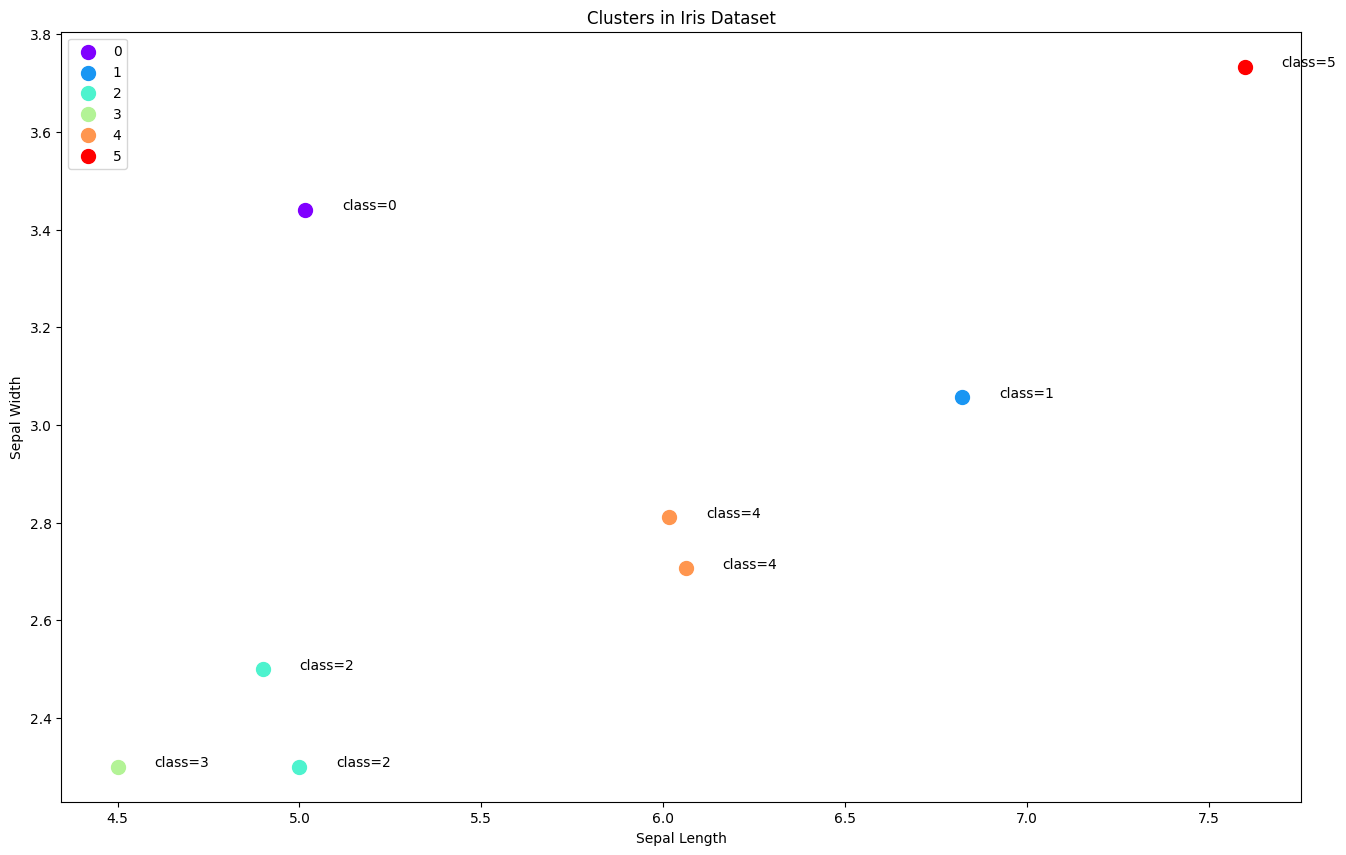

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
  subset = agglo.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i, 'sepal-length'] + 0.1, subset.loc[i, 'sepal-width'], f'class={label}')
  plt.scatter(subset['sepal-length'], subset['sepal-width'], s=100, c=color, label=label)

plt.legend()
plt.title('Clusters in Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Merupakan visualisasikan hasil klastering menggunakan AgglomerativeClustering pada dataset Iris. Data dibagi menjadi beberapa kluster dan dipetakan dalam plot 2D berdasarkan panjang dan lebar sepal. Setiap kluster diwakili oleh warna yang berbeda dan titik data diberi label sesuai dengan kluster yang mereka masuki.

# **Perbedaan Agglomerative clustering menggunakan scipy dan Agglomerative clustering menggunakan scikit-learn**

1. Cara visualisasi
*   Pada scipy menyediakan kemampuan visualisasi yang lebih baik melalui dendrogram, yang membantu dalam menentukan jumlah cluster dengan cara memotong pohon pada tingkat tertentu. Ini memungkinkan analisis visual yang mendalam terhadap struktur data
*   Sedangkan pada Scikit-learn tidak secara langsung menyediakan alat untuk visualisasi dendrogram. Pengguna harus mengandalkan SciPy atau alat lain untuk visualisasi setelah melakukan clustering dengan scikit-learn
2. Penggunaan
*   SciPy lebih fleksibel dalam hal pemilihan metode pengukuran jarak dan kriteria penggabungan. Terdapat berbagai pilihan seperti "single", "complete", "average", dan "ward", serta dukungan untuk berbagai metrik jarak
*   Pada Scikit-learn pilihan lebih terbatas dibandingkan dengan SciPy. Namun, scikit-learn memberikan kemudahan integrasi dengan pipeline machine learning lainnya, membuatnya lebih cocok untuk aplikasi yang memerlukan preprocessing atau evaluasi model.